In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import jax

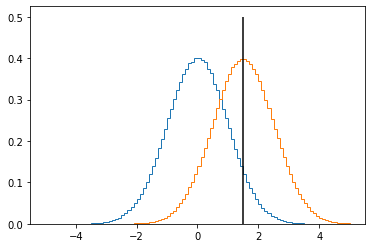

In [28]:
a =  sps.norm(0,1).rvs(int(1e6))
b =  sps.norm(1.5,1).rvs(int(1e6))
edges = np.linspace(-5,5,101)
c1,_,_=plt.hist(a,bins = edges, density=True, histtype='step');
c2,_,_=plt.hist(b,bins = edges, density=True, histtype='step');


def get_errs(a,b,cut):
    size = len(a[a>cut])/len(a)
    power = len(b[b>cut])/len(b)
    return size,power

cut = edges[65]
plt.vlines(cut,0,0.5,colors = 'k')


In [29]:
roc = np.array([get_errs(a,b,e) for e in edges])

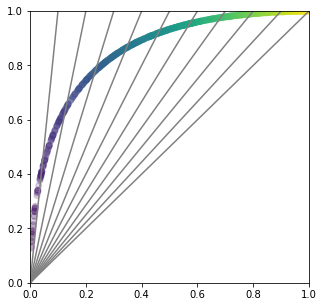

In [71]:
size = np.random.uniform(0,1,size = (1000,))
power = np.interp(size,roc[::-1,0],roc[::-1,1])
plt.scatter(size,power,alpha=0.2,c = size/power)

cls_iso = np.linspace(0,1,11)
xi = np.linspace(0,1)
yis = [1/c*xi for c in cls_iso]
for yi in yis:
    plt.plot(xi,yi,c='gray')
plt.xlim(0,1)
plt.ylim(0,1)

plt.gcf().set_size_inches(5,5)

(0.0, 1.0)

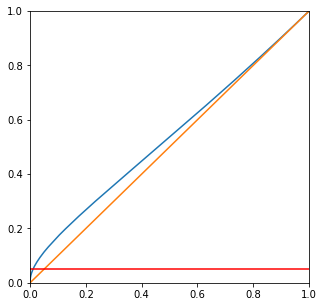

In [82]:
size = np.linspace(0,1,1001)
power = np.interp(size,roc[::-1,0],roc[::-1,1])
plt.plot(size,size/power)
plt.plot(size,size)
plt.gcf().set_size_inches(5,5)
plt.hlines(0.05,0,1,colors='r')
plt.xlim(0,1)
plt.ylim(0,1)

(0.0, 1.0)

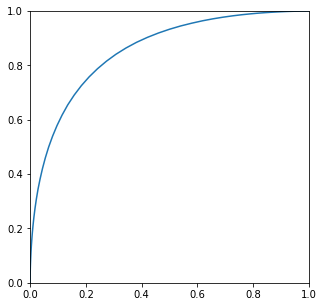

In [30]:
plt.plot(roc[:,0],roc[:,1])
plt.gcf().set_size_inches(5,5)
plt.xlim(0,1)
plt.ylim(0,1)